In [109]:
#!pip install pandas numpy matplotlib plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/PC POINT/OneDrive/Documents/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
train_data,test_data = df[0:501],df[501:546]

In [25]:
x_train = np.array(train_data['area'].tolist())
y_train = np.array(train_data['price'].tolist())

In [26]:
y_train

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [27]:
# Scale features and target
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train.reshape(-1, 1)).flatten()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
# x_scaled = np.array([1.0, 2.0])   #features
# y_scaled = np.array([300.0, 500.0])   #target value

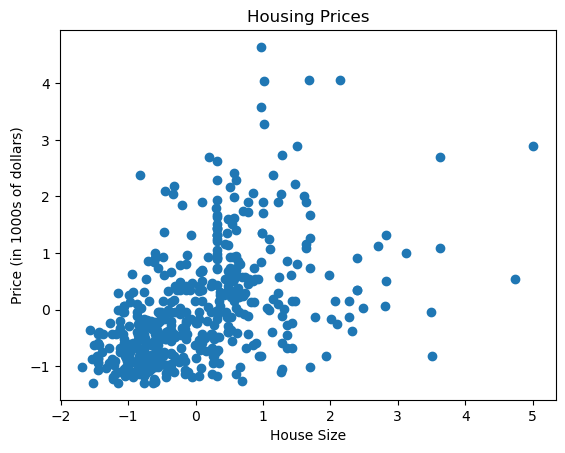

In [28]:
# Plot the data points
plt.scatter(x_train_scaled, y_train_scaled)
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('House Size')
plt.show()

# # Steps to predict house price for 1 variable
>We took price as y (target variable) and area as x (feature)
>We will compute the cost using cost function
>In next step, we will apply gradient descent to update w and b values to minimize cost
>After cost minimization, we will take the final w and b parameters and apply on our linear regression model -> f=wx+b
>Then compute model output


In [29]:
def compute_cost_function(w, b, x, y):
    m = x.shape[0]
    f_w = w * x + b  # Vectorized computation
    cost_sum = np.sum((f_w - y) ** 2)  # Vectorized summation
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

In [30]:
cost = compute_cost_function(0,0,x_train_scaled,y_train_scaled)
cost

0.5000000000000001

In [31]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

In [32]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_w = 0.0
    dj_b = 0.0
    for i in range(m):
        f_x = w*x[i]+b
        dj_w += (f_x-y[i])*x[i]
        dj_b += (f_x-y[i])
    dj_w = dj_w / m
    dj_b = dj_b / m
    return dj_w,dj_b

In [33]:
# def gradient_descent(x,y,w_in,b_in,num_iter,alpha):
#     m = x.shape[0]
#     w = w_in
#     b = b_in
#     cost_history = []
#     w_b_history = []
#     for i in range(num_iter):
#         dj_w,dj_b = compute_gradient(x,y,w,b)
#         w = w-(alpha*dj_w)
#         b = b-(alpha*dj_b)
#         cost_history.append(compute_cost_function(w,b,x,y))
#         w_b_history.append([w,b])
#         print(f'cost function for w = {w} and b = {b} and dj_w={dj_w} dj_b={dj_b} is ',compute_cost_function(w,b,x,y))
#     return cost_history,w_b_history

def gradient_descent(x, y, w_in, b_in, num_iter, alpha):
    w = w_in
    b = b_in
    cost_history = []
    for i in range(num_iter):
        # Compute gradients
        dj_w, dj_b = compute_gradient(x, y, w, b)
        
        # Update parameters
        w -= alpha * dj_w
        b -= alpha * dj_b
        
        # Record cost
        cost = compute_cost_function(w, b, x, y)
        cost_history.append(cost)

        # Optional: Print updates every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost={cost}, w={w}, b={b}")

    return cost_history, [w, b]


In [34]:
cost_history, w_b_hist = gradient_descent(x_train_scaled, y_train_scaled, 0.0, 0.0, 1000, 0.01)

Iteration 0: Cost=0.49753262151881733, w=0.004979736306294622, b=-1.628327102783563e-17
Iteration 100: Cost=0.3922925413065877, w=0.3175219212569459, b=-8.708270299140678e-17
Iteration 200: Cost=0.37819250957772726, w=0.4319224689610836, b=-1.1595514967372447e-16
Iteration 300: Cost=0.37630339191120765, w=0.4737967692801689, b=-6.237636266895988e-17
Iteration 400: Cost=0.37605028854047895, w=0.4891241174651419, b=-1.0298481960759456e-16
Iteration 500: Cost=0.3760163778331632, w=0.4947344226067977, b=-9.200447013250944e-17
Iteration 600: Cost=0.3760118344876229, w=0.4967879757330551, b=-1.1394522495648885e-16
Iteration 700: Cost=0.37601122577166457, w=0.49753964259178796, b=-1.2359375000482792e-16
Iteration 800: Cost=0.37601114421609844, w=0.4978147769719475, b=-9.591573487994128e-17
Iteration 900: Cost=0.3760111332893102, w=0.49791548505328215, b=-1.561536440184355e-16


In [35]:
w_b_value = w_b_hist
w_b_value

[0.49795213248665005, -1.2438043498235666e-16]

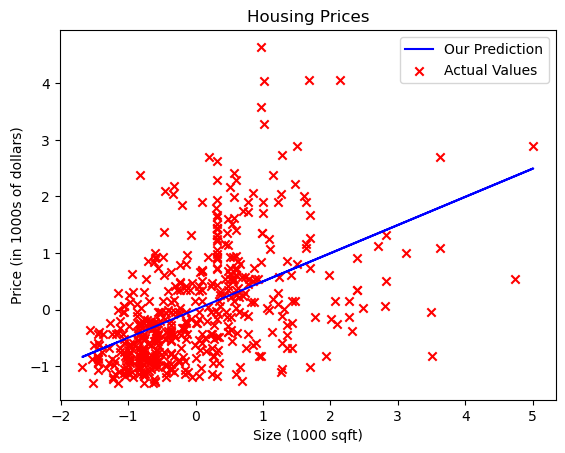

In [36]:
tmp_f_wb = compute_model_output(x_train_scaled, w_b_value[0], w_b_value[1])

# Plot our model prediction
plt.plot(x_train_scaled, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train_scaled, y_train_scaled, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

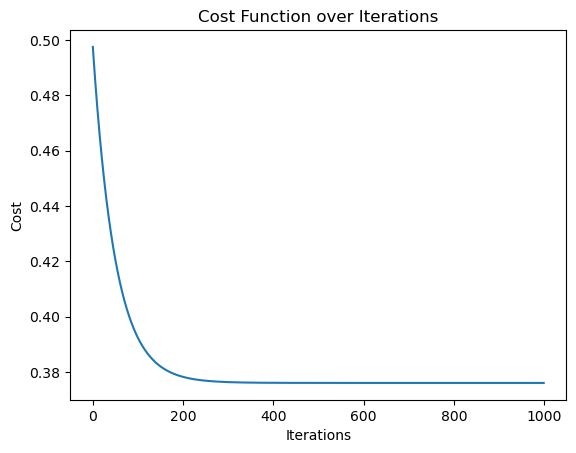

In [37]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.show()

In [38]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [39]:
predictions_scaled = w_b_value[0] * x_train_scaled + w_b_value[1]
predictions_original = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = w_b_value[0] * predictions_original + w_b_value[1]
mse = mean_squared_error(y_train, predictions_original)
mae = mean_absolute_error(y_train, predictions_original)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2414704017772.3755
Mean Absolute Error: 1149706.3436269255


In [41]:
new_df = pd.DataFrame({
    'area':train_data['area'],
    'price':train_data['price'],
    'predicted_price':predictions_original
})

In [42]:
predictions_original

array([5850492.35744206, 6482184.03603006, 6892373.43771059,
       5883307.5095765 , 5850492.35744206, 5883307.5095765 ,
       6326312.06339147, 9451955.30419705, 6129421.15058481,
       5165476.05663558, 8221387.09915548, 5268023.40705571,
       5493627.57798   , 4242549.90285441, 6006364.33008066,
       5268023.40705571, 5514137.04806403, 6293496.91125702,
       4693758.24470298, 5440302.95576153, 4578905.21223244,
       5741792.16599672, 6108911.68050079, 4677350.66863576,
       6416553.73176118, 5489525.6839632 , 5268023.40705571,
       6447317.93688722, 6067892.74033274, 5062928.70621545,
       5873052.77453449, 5678212.80873624, 4808611.27717353,
       5251615.83098849, 5612582.50446735, 5678212.80873624,
       5875924.10034625, 6498591.61209729, 5268023.40705571,
       5268023.40705571, 5493627.57798   , 5415691.5916607 ,
       5464914.31986237, 5268023.40705571, 5268023.40705571,
       5268023.40705571, 5268023.40705571, 5514137.04806403,
       4570701.42419882,

In [43]:
new_df

,area,price,predicted_price
0,7420,13300000,5.850492e+06
1,8960,12250000,6.482184e+06
2,9960,12250000,6.892373e+06
3,7500,12215000,5.883308e+06
4,7420,11410000,5.850492e+06
...,...,...,...
496,4000,2695000,4.447645e+06
497,3934,2660000,4.420572e+06
498,2000,2660000,3.627266e+06
499,3630,2660000,4.295875e+06


In [44]:
correlation = train_data['area'].corr(train_data['price'])
print(f"Correlation between area and price: {correlation}")

Correlation between area and price: 0.49797363062946204
